# Incidence du syndrome grippal

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

On rajoute le path local du fichier téléchargé

In [25]:
# data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"
data_path = "inc-3-PAY.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

On lit le fichier situé à l'adresse `data_path` au lieu de l'url

In [26]:
# raw_data = pd.read_csv(data_url, skiprows=1)
raw_data = pd.read_csv(data_path, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202443          3   54956   46518.0   63394.0     82        69.0   
1     202442          3   68328   60465.0   76191.0    102        90.0   
2     202441          3   79435   71386.0   87484.0    119       107.0   
3     202440          3   84965   76555.0   93375.0    127       114.0   
4     202439          3   91660   82937.0  100383.0    137       124.0   
5     202438          3   91786   82903.0  100669.0    138       125.0   
6     202437          3   56460   49319.0   63601.0     85        74.0   
7     202436          3   33657   27906.0   39408.0     50        41.0   
8     202435          3   27404   22036.0   32772.0     41        33.0   
9     202434          3   26717   21003.0   32431.0     40        31.0   
10    202433          3   20623   15349.0   25897.0     31        23.0   
11    202432          3   23187   17532.0   28842.0     35        27.0   
12    202431          3   26035   20267.0   31803.0     39        30.0   
13    202430          3   36393   28593.0   44193.0     55        43.0   
14    202429          3   39560   32592.0   46528.0     59        49.0   
15    202428          3   54342   45781.0   62903.0     81        68.0   
16    202427          3   47364   40234.0   54494.0     71        60.0   
17    202426          3   44219   36956.0   51482.0     66        55.0   
18    202425          3   47204   40300.0   54108.0     71        61.0   
19    202424          3   41110   34671.0   47549.0     62        52.0   
20    202423          3   35875   30610.0   41140.0     54        46.0   
21    202422          3   33772   28274.0   39270.0     51        43.0   
22    202421          3   21963   17556.0   26370.0     33        26.0   
23    202420          3   20057   15780.0   24334.0     30        24.0   
24    202419          3   15375   11274.0   19476.0     23        17.0   
25    202418          3   22409   17653.0   27165.0     34        27.0   
26    202417          3   27042   21410.0   32674.0     41        33.0   
27    202416          3   28882   23305.0   34459.0     43        35.0   
28    202415          3   30229   24648.0   35810.0     45        37.0   
29    202414          3   31813   26529.0   37097.0     48        40.0   
...      ...        ...     ...       ...       ...    ...         ...   
2057  198521          3   26096   19621.0   32571.0     47        35.0   
2058  198520          3   27896   20885.0   34907.0     51        38.0   
2059  198519          3   43154   32821.0   53487.0     78        59.0   
2060  198518          3   40555   29935.0   51175.0     74        55.0   
2061  198517          3   34053   24366.0   43740.0     62        44.0   
2062  198516          3   50362   36451.0   64273.0     91        66.0   
2063  198515          3   63881   45538.0   82224.0    116        83.0   
2064  198514          3  134545  114400.0  154690.0    244       207.0   
2065  198513          3  197206  176080.0  218332.0    357       319.0   
2066  198512          3  245240  223304.0  267176.0    445       405.0   
2067  198511          3  276205  252399.0  300011.0    501       458.0   
2068  198510          3  353231  326279.0  380183.0    640       591.0   
2069  198509          3  369895  341109.0  398681.0    670       618.0   
2070  198508          3  389886  359529.0  420243.0    707       652.0   
2071  198507          3  471852  432599.0  511105.0    855       784.0   
2072  198506          3  565825  518011.0  613639.0   1026       939.0   
2073  198505          3  637302  592795.0  681809.0   1155      1074.0   
2074  198504          3  424937  390794.0  459080.0    770       708.0   
2075  198503          3  213901  174689.0  253113.0    388       317.0   
2076  198502          3   97586   80949.0  114223.0    177       147.0   
2077  198501          3   85489   65918.0  105060.0    155       120.0   
2078  198452          3   84830   60602.0  109058.0    154       110.0   
2079  198451

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [27]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1850  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1850        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [28]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202443          3   54956   46518.0   63394.0     82        69.0   
1     202442          3   68328   60465.0   76191.0    102        90.0   
2     202441          3   79435   71386.0   87484.0    119       107.0   
3     202440          3   84965   76555.0   93375.0    127       114.0   
4     202439          3   91660   82937.0  100383.0    137       124.0   
5     202438          3   91786   82903.0  100669.0    138       125.0   
6     202437          3   56460   49319.0   63601.0     85        74.0   
7     202436          3   33657   27906.0   39408.0     50        41.0   
8     202435          3   27404   22036.0   32772.0     41        33.0   
9     202434          3   26717   21003.0   32431.0     40        31.0   
10    202433          3   20623   15349.0   25897.0     31        23.0   
11    202432          3   23187   17532.0   28842.0     35        27.0   
12    202431          3   26035   20267.0   31803.0     39        30.0   
13    202430          3   36393   28593.0   44193.0     55        43.0   
14    202429          3   39560   32592.0   46528.0     59        49.0   
15    202428          3   54342   45781.0   62903.0     81        68.0   
16    202427          3   47364   40234.0   54494.0     71        60.0   
17    202426          3   44219   36956.0   51482.0     66        55.0   
18    202425          3   47204   40300.0   54108.0     71        61.0   
19    202424          3   41110   34671.0   47549.0     62        52.0   
20    202423          3   35875   30610.0   41140.0     54        46.0   
21    202422          3   33772   28274.0   39270.0     51        43.0   
22    202421          3   21963   17556.0   26370.0     33        26.0   
23    202420          3   20057   15780.0   24334.0     30        24.0   
24    202419          3   15375   11274.0   19476.0     23        17.0   
25    202418          3   22409   17653.0   27165.0     34        27.0   
26    202417          3   27042   21410.0   32674.0     41        33.0   
27    202416          3   28882   23305.0   34459.0     43        35.0   
28    202415          3   30229   24648.0   35810.0     45        37.0   
29    202414          3   31813   26529.0   37097.0     48        40.0   
...      ...        ...     ...       ...       ...    ...         ...   
2057  198521          3   26096   19621.0   32571.0     47        35.0   
2058  198520          3   27896   20885.0   34907.0     51        38.0   
2059  198519          3   43154   32821.0   53487.0     78        59.0   
2060  198518          3   40555   29935.0   51175.0     74        55.0   
2061  198517          3   34053   24366.0   43740.0     62        44.0   
2062  198516          3   50362   36451.0   64273.0     91        66.0   
2063  198515          3   63881   45538.0   82224.0    116        83.0   
2064  198514          3  134545  114400.0  154690.0    244       207.0   
2065  198513          3  197206  176080.0  218332.0    357       319.0   
2066  198512          3  245240  223304.0  267176.0    445       405.0   
2067  198511          3  276205  252399.0  300011.0    501       458.0   
2068  198510          3  353231  326279.0  380183.0    640       591.0   
2069  198509          3  369895  341109.0  398681.0    670       618.0   
2070  198508          3  389886  359529.0  420243.0    707       652.0   
2071  198507          3  471852  432599.0  511105.0    855       784.0   
2072  198506          3  565825  518011.0  613639.0   1026       939.0   
2073  198505          3  637302  592795.0  681809.0   1155      1074.0   
2074  198504          3  424937  390794.0  459080.0    770       708.0   
2075  198503          3  213901  174689.0  253113.0    388       317.0   
2076  198502          3   97586   80949.0  114223.0    177       147.0   
2077  198501          3   85489   65918.0  105060.0    155       120.0   
2078  198452          3   84830   60602.0  109058.0    154       110.0   
2079  198451

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [29]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [30]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [31]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


In [32]:
sorted_data.dtypes

week            int64
indicator       int64
inc            object
inc_low       float64
inc_up        float64
inc100         object
inc100_low    float64
inc100_up     float64
geo_insee      object
geo_name       object
dtype: object

Il faut passer la colonne inc en float pour pouvoir la plot

In [33]:
sorted_data = sorted_data.astype({'inc': 'float64'})

Un premier regard sur les données !

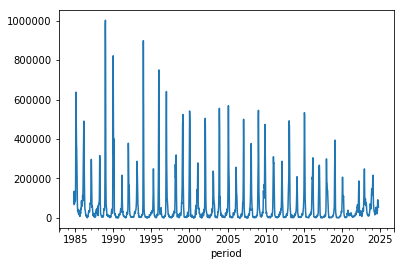

In [34]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

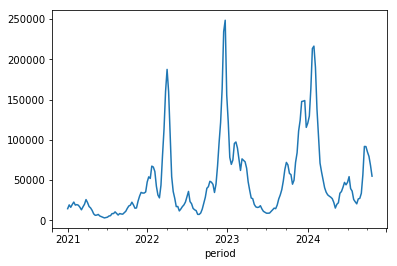

In [35]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [36]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [37]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

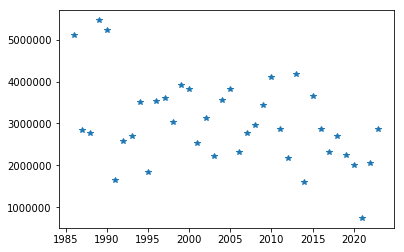

In [38]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [39]:
yearly_incidence.sort_values()

2021     743449.0
2014    1600941.0
1991    1659249.0
1995    1840410.0
2020    2010315.0
2022    2060304.0
2012    2175217.0
2003    2234584.0
2019    2254386.0
2006    2307352.0
2017    2321583.0
2001    2529279.0
1992    2574578.0
1993    2703886.0
2018    2705325.0
1988    2765617.0
2007    2780164.0
1987    2855570.0
2016    2856393.0
2011    2857040.0
2023    2873501.0
2008    2973918.0
1998    3034904.0
2002    3125418.0
2009    3444020.0
1994    3514763.0
1996    3539413.0
2004    3567744.0
1997    3620066.0
2015    3654892.0
2000    3826372.0
2005    3835025.0
1999    3908112.0
2010    4111392.0
2013    4182691.0
1986    5115251.0
1990    5235827.0
1989    5466192.0
dtype: float64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

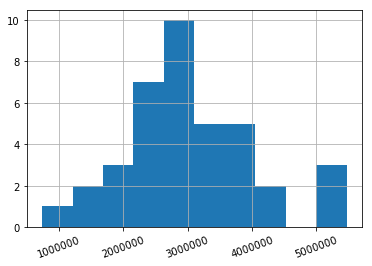

In [40]:
yearly_incidence.hist(xrot=20)